In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
# seaborn is going to be your friend
import seaborn as sns

In [2]:
df = pd.read_csv("netgen.csv")

In [3]:
budget_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

In [4]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
budget_df['production_budget'] = budget_df['production_budget'].str.replace(",","")
budget_df['production_budget'] = budget_df['production_budget'].str.replace("$","")
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace(",","")
budget_df['domestic_gross'] = budget_df['domestic_gross'].str.replace("$","")
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace(",","")
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].str.replace("$","")

In [6]:
budget_df['domestic_gross'] = budget_df['domestic_gross'].apply(lambda x: int(x))
budget_df['production_budget'] = budget_df['production_budget'].apply(lambda x: int(x))
budget_df['worldwide_gross'] = budget_df['worldwide_gross'].apply(lambda x: int(x))

In [7]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [8]:
con = sqlite3.connect("zippedData/im.db/im.db")

cur = con.cursor()

In [9]:
%%bash 
sqlite3 zippedData/im.db/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [10]:
persons_df = pd.read_sql("""
SELECT *
FROM persons
""",con)

In [11]:
persons_df

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"
...,...,...,...,...,...
606643,nm9990381,Susan Grobes,NaN,NaN,actress
606644,nm9990690,Joo Yeon So,NaN,NaN,actress
606645,nm9991320,Madeline Smith,NaN,NaN,actress
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer


In [12]:
pri_per_df = pd.read_sql("""
SELECT *
FROM principals
LEFT JOIN persons
ON principals.person_id = persons.person_id
""",con)

In [13]:
pri_per_df

,movie_id,ordering,person_id,category,job,characters,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",nm0246005,Tommy Dysart,NaN,NaN,actor
1,tt0111414,2,nm0398271,director,None,None,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer"
2,tt0111414,3,nm3739909,producer,producer,None,nm3739909,Barry Porter-Robinson,NaN,NaN,"producer,art_department"
3,tt0323808,10,nm0059247,editor,None,None,nm0059247,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",nm3579312,Brittania Nicol,NaN,NaN,"actress,soundtrack"
...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]",nm0186469,Kenneth Cranham,1944.0,NaN,"actor,soundtrack"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]",nm4929530,Pearl Mackie,1987.0,NaN,actress
1028183,tt9692684,3,nm10441594,director,None,None,nm10441594,Guy Jones,NaN,NaN,director
1028184,tt9692684,4,nm6009913,writer,writer,None,nm6009913,Sabrina Mahfouz,NaN,NaN,writer


In [14]:
pri_per_df

,movie_id,ordering,person_id,category,job,characters,person_id,primary_name,birth_year,death_year,primary_profession
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]",nm0246005,Tommy Dysart,NaN,NaN,actor
1,tt0111414,2,nm0398271,director,None,None,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer"
2,tt0111414,3,nm3739909,producer,producer,None,nm3739909,Barry Porter-Robinson,NaN,NaN,"producer,art_department"
3,tt0323808,10,nm0059247,editor,None,None,nm0059247,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",nm3579312,Brittania Nicol,NaN,NaN,"actress,soundtrack"
...,...,...,...,...,...,...,...,...,...,...,...
1028181,tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]",nm0186469,Kenneth Cranham,1944.0,NaN,"actor,soundtrack"
1028182,tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]",nm4929530,Pearl Mackie,1987.0,NaN,actress
1028183,tt9692684,3,nm10441594,director,None,None,nm10441594,Guy Jones,NaN,NaN,director
1028184,tt9692684,4,nm6009913,writer,writer,None,nm6009913,Sabrina Mahfouz,NaN,NaN,writer


In [15]:
reviews_df = pd.read_csv("review_dataframe.csv")

In [16]:
reviews_df

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratingbyvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77.0,0.090909
1,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77.0,0.090909
2,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77.0,0.090909
3,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43.0,0.167442
4,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43.0,0.167442
...,...,...,...,...,...,...,...,...,...,...
117830,146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0,1.240000
117831,146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0,1.033333
117832,146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136.0,0.063971
117833,146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Family,8.7,136.0,0.063971


In [17]:
reviews_df = reviews_df.set_index('movie_id')
pri_per_df = pri_per_df.set_index('movie_id')

In [18]:
reviews_df

,Unnamed: 0,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratingbyvotes
movie_id,,,,,,,,,
tt0063540,0,Sunghursh,Sunghursh,2013,175.0,Action,7.0,77.0,0.090909
tt0063540,0,Sunghursh,Sunghursh,2013,175.0,Crime,7.0,77.0,0.090909
tt0063540,0,Sunghursh,Sunghursh,2013,175.0,Drama,7.0,77.0,0.090909
tt0066787,1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Biography,7.2,43.0,0.167442
tt0066787,1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,Drama,7.2,43.0,0.167442
...,...,...,...,...,...,...,...,...,...
tt9913056,146114,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0,1.240000
tt9913084,146115,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0,1.033333
tt9914286,146122,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,Drama,8.7,136.0,0.063971


In [19]:
pri_per_df

,ordering,person_id,category,job,characters,person_id,primary_name,birth_year,death_year,primary_profession
movie_id,,,,,,,,,,
tt0111414,1,nm0246005,actor,None,"[""The Man""]",nm0246005,Tommy Dysart,NaN,NaN,actor
tt0111414,2,nm0398271,director,None,None,nm0398271,Frank Howson,1952.0,NaN,"actor,writer,producer"
tt0111414,3,nm3739909,producer,producer,None,nm3739909,Barry Porter-Robinson,NaN,NaN,"producer,art_department"
tt0323808,10,nm0059247,editor,None,None,nm0059247,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]",nm3579312,Brittania Nicol,NaN,NaN,"actress,soundtrack"
...,...,...,...,...,...,...,...,...,...,...
tt9692684,1,nm0186469,actor,None,"[""Ebenezer Scrooge""]",nm0186469,Kenneth Cranham,1944.0,NaN,"actor,soundtrack"
tt9692684,2,nm4929530,self,None,"[""Herself"",""Regan""]",nm4929530,Pearl Mackie,1987.0,NaN,actress
tt9692684,3,nm10441594,director,None,None,nm10441594,Guy Jones,NaN,NaN,director


In [20]:
imdb_df = pri_per_df.merge(reviews_df, on = "movie_id", how = "left")

In [21]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1489808 entries, tt0111414 to tt9692684
Data columns (total 19 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ordering            1489808 non-null  int64  
 1   person_id           1489808 non-null  object 
 2   category            1489808 non-null  object 
 3   job                 281532 non-null   object 
 4   characters          580465 non-null   object 
 5   person_id           1489449 non-null  object 
 6   primary_name        1489449 non-null  object 
 7   birth_year          381706 non-null   float64
 8   death_year          17976 non-null    float64
 9   primary_profession  1421687 non-null  object 
 10  Unnamed: 0          1024406 non-null  float64
 11  primary_title       1024406 non-null  object 
 12  original_title      1024406 non-null  object 
 13  start_year          1024406 non-null  float64
 14  runtime_minutes     1024406 non-null  float64
 15  genres    

In [22]:
imdb_df = imdb_df.drop(["job",'characters','birth_year','death_year','Unnamed: 0'],axis = 1)

In [23]:
imdb_df = imdb_df.dropna(subset = ['genres'])

In [24]:
imdb_df["movie_id"] = imdb_df.index

In [25]:
imdb_df = imdb_df.set_index("primary_title", drop = False)

In [26]:
cols = imdb_df.columns.tolist()

In [27]:
imdb_df

,ordering,person_id,category,person_id,primary_name,primary_profession,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,ratingbyvotes,movie_id
primary_title,,,,,,,,,,,,,,,
The Wicker Tree,10,nm0059247,editor,nm0059247,Sean Barton,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011.0,96.0,Drama,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,10,nm0059247,editor,nm0059247,Sean Barton,"editor,editorial_department,assistant_director",The Wicker Tree,The Wicker Tree,2011.0,96.0,Horror,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,1,nm3579312,actress,nm3579312,Brittania Nicol,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011.0,96.0,Drama,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,1,nm3579312,actress,nm3579312,Brittania Nicol,"actress,soundtrack",The Wicker Tree,The Wicker Tree,2011.0,96.0,Horror,3.9,2328.0,0.001675,tt0323808
The Wicker Tree,2,nm2694680,actor,nm2694680,Henry Garrett,actor,The Wicker Tree,The Wicker Tree,2011.0,96.0,Drama,3.9,2328.0,0.001675,tt0323808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A Russian Youth,7,nm9645603,cinematographer,nm9645603,Ayrat Yamilov,cinematographer,A Russian Youth,Malchik russkiy,2019.0,72.0,War,6.6,34.0,0.194118,tt9681728
A Russian Youth,8,nm10436663,actor,nm10436663,Artem Leshik,actor,A Russian Youth,Malchik russkiy,2019.0,72.0,Drama,6.6,34.0,0.194118,tt9681728
A Russian Youth,8,nm10436663,actor,nm10436663,Artem Leshik,actor,A Russian Youth,Malchik russkiy,2019.0,72.0,War,6.6,34.0,0.194118,tt9681728


In [28]:
cols

['ordering',
 'person_id',
 'category',
 'person_id',
 'primary_name',
 'primary_profession',
 'primary_title',
 'original_title',
 'start_year',
 'runtime_minutes',
 'genres',
 'averagerating',
 'numvotes',
 'ratingbyvotes',
 'movie_id']

In [34]:
cols_alt = ['movie_id', 'primary_title', 'original_title', 'genres', 'start_year', 'runtime_minutes', 'averagerating', 'ratingbyvotes', 'numvotes', 'ordering', 'person_id', 'primary_name', 'person_id', 'category', 'primary_profession']

In [36]:
cols_alt = ['movie_id', 'primary_title', 'original_title', 'genres', 'start_year', 'runtime_minutes', 'averagerating', 'numvotes', 'primary_name', 'category']

In [38]:
imdb_df_alt = imdb_df[cols_alt]

Analyzing data and adding budget below

In [40]:
imdb_df.to_csv('imdb_masterdata.csv')

In [41]:
imdb_df_alt.to_csv('imdb_masterdata.csv')

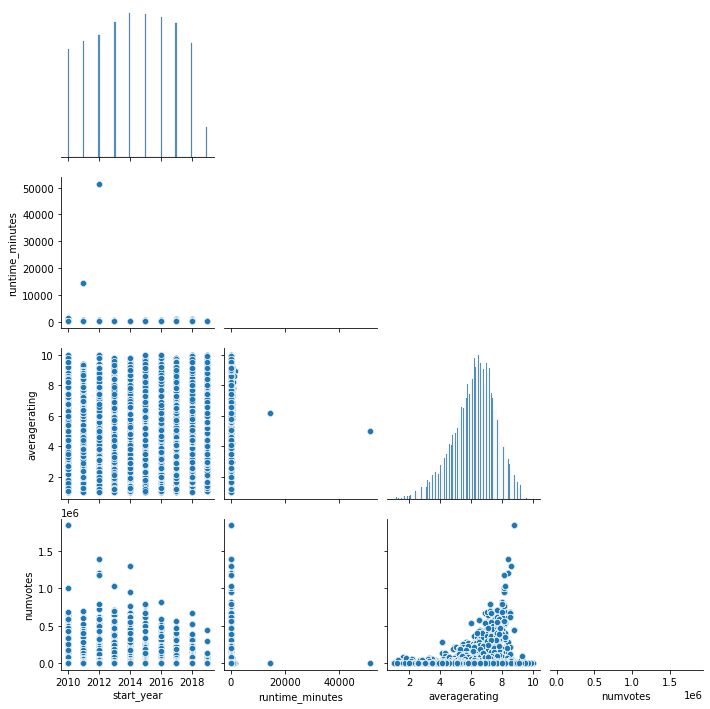

In [42]:
sns.pairplot(imdb_df_alt, corner = True)
plt.show()

In [43]:
imdb_df_alt

,movie_id,primary_title,original_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,category
primary_title,,,,,,,,,,
The Wicker Tree,tt0323808,The Wicker Tree,The Wicker Tree,Drama,2011.0,96.0,3.9,2328.0,Sean Barton,editor
The Wicker Tree,tt0323808,The Wicker Tree,The Wicker Tree,Horror,2011.0,96.0,3.9,2328.0,Sean Barton,editor
The Wicker Tree,tt0323808,The Wicker Tree,The Wicker Tree,Drama,2011.0,96.0,3.9,2328.0,Brittania Nicol,actress
The Wicker Tree,tt0323808,The Wicker Tree,The Wicker Tree,Horror,2011.0,96.0,3.9,2328.0,Brittania Nicol,actress
The Wicker Tree,tt0323808,The Wicker Tree,The Wicker Tree,Drama,2011.0,96.0,3.9,2328.0,Henry Garrett,actor
...,...,...,...,...,...,...,...,...,...,...
A Russian Youth,tt9681728,A Russian Youth,Malchik russkiy,War,2019.0,72.0,6.6,34.0,Ayrat Yamilov,cinematographer
A Russian Youth,tt9681728,A Russian Youth,Malchik russkiy,Drama,2019.0,72.0,6.6,34.0,Artem Leshik,actor
A Russian Youth,tt9681728,A Russian Youth,Malchik russkiy,War,2019.0,72.0,6.6,34.0,Artem Leshik,actor


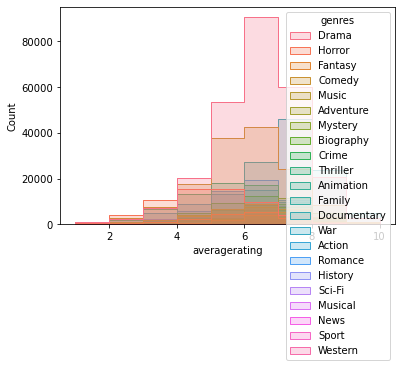

In [45]:
sns.histplot(x = 'averagerating', hue = 'genres', element="step", data = imdb_df_alt, binwidth = 1)
plt.show()

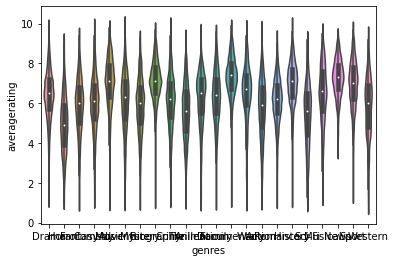

In [54]:
sns.violinplot(x = 'genres', y = 'averagerating',
                
               data = imdb_df_alt)
plt.show()

In [66]:
budget_df = budget_df.rename(columns={"movie_id": "primary_title"})

In [67]:
budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   primary_title      5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 271.2+ KB


In [73]:
imdb_df_alt.reset_index(drop = True, inplace = True)

In [74]:
imdb_df_alt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024406 entries, 0 to 1024405
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   movie_id         1024406 non-null  object 
 1   primary_title    1024406 non-null  object 
 2   original_title   1024406 non-null  object 
 3   genres           1024406 non-null  object 
 4   start_year       1024406 non-null  float64
 5   runtime_minutes  1024406 non-null  float64
 6   averagerating    1024406 non-null  float64
 7   numvotes         1024406 non-null  float64
 8   primary_name     1024196 non-null  object 
 9   category         1024406 non-null  object 
dtypes: float64(4), object(6)
memory usage: 78.2+ MB


In [75]:
imdb_budget_df = imdb_df_alt.merge(budget_df, on = 'primary_title', how = "left")

In [78]:
imdb_budget_df = imdb_budget_df.dropna(subset = ['production_budget'])

In [80]:
imdb_budget_df["revenue"] = imdb_budget_df["worldwide_gross"] + imdb_budget_df["production_budget"]

In [82]:
imdb_budget_df['profit_margin'] = imdb_budget_df["worldwide_gross"] / imdb_budget_df["revenue"]

In [84]:
imdb_budget_df.to_csv('imdb_budget_data.csv')

In [91]:
imdb_budget_df['release_date'] = imdb_budget_df['release_date'].astype('datetime64')

In [92]:
imdb_budget_df

,movie_id,primary_title,original_title,genres,start_year,runtime_minutes,averagerating,numvotes,primary_name,category,id,release_date,production_budget,domestic_gross,worldwide_gross,revenue,profit_margin
40,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
41,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
42,tt0475290,"Hail, Caesar!","Hail, Caesar!",Music,2016.0,106.0,6.3,111422.0,Roger Deakins,cinematographer,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
43,tt0475290,"Hail, Caesar!","Hail, Caesar!",Comedy,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
44,tt0475290,"Hail, Caesar!","Hail, Caesar!",Drama,2016.0,106.0,6.3,111422.0,Josh Brolin,actor,22.0,2016-02-05,22000000.0,30080225.0,64160680.0,86160680.0,0.744663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026474,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Kristen Carletta,actress,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795
1026475,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Jay Coster,director,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795
1026476,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Katie Watling,producer,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795
1026477,tt8662424,Never Again,Never Again,Drama,2017.0,106.0,5.7,67.0,Ben Gordelia,composer,47.0,2002-07-12,500000.0,307631.0,308793.0,808793.0,0.381795


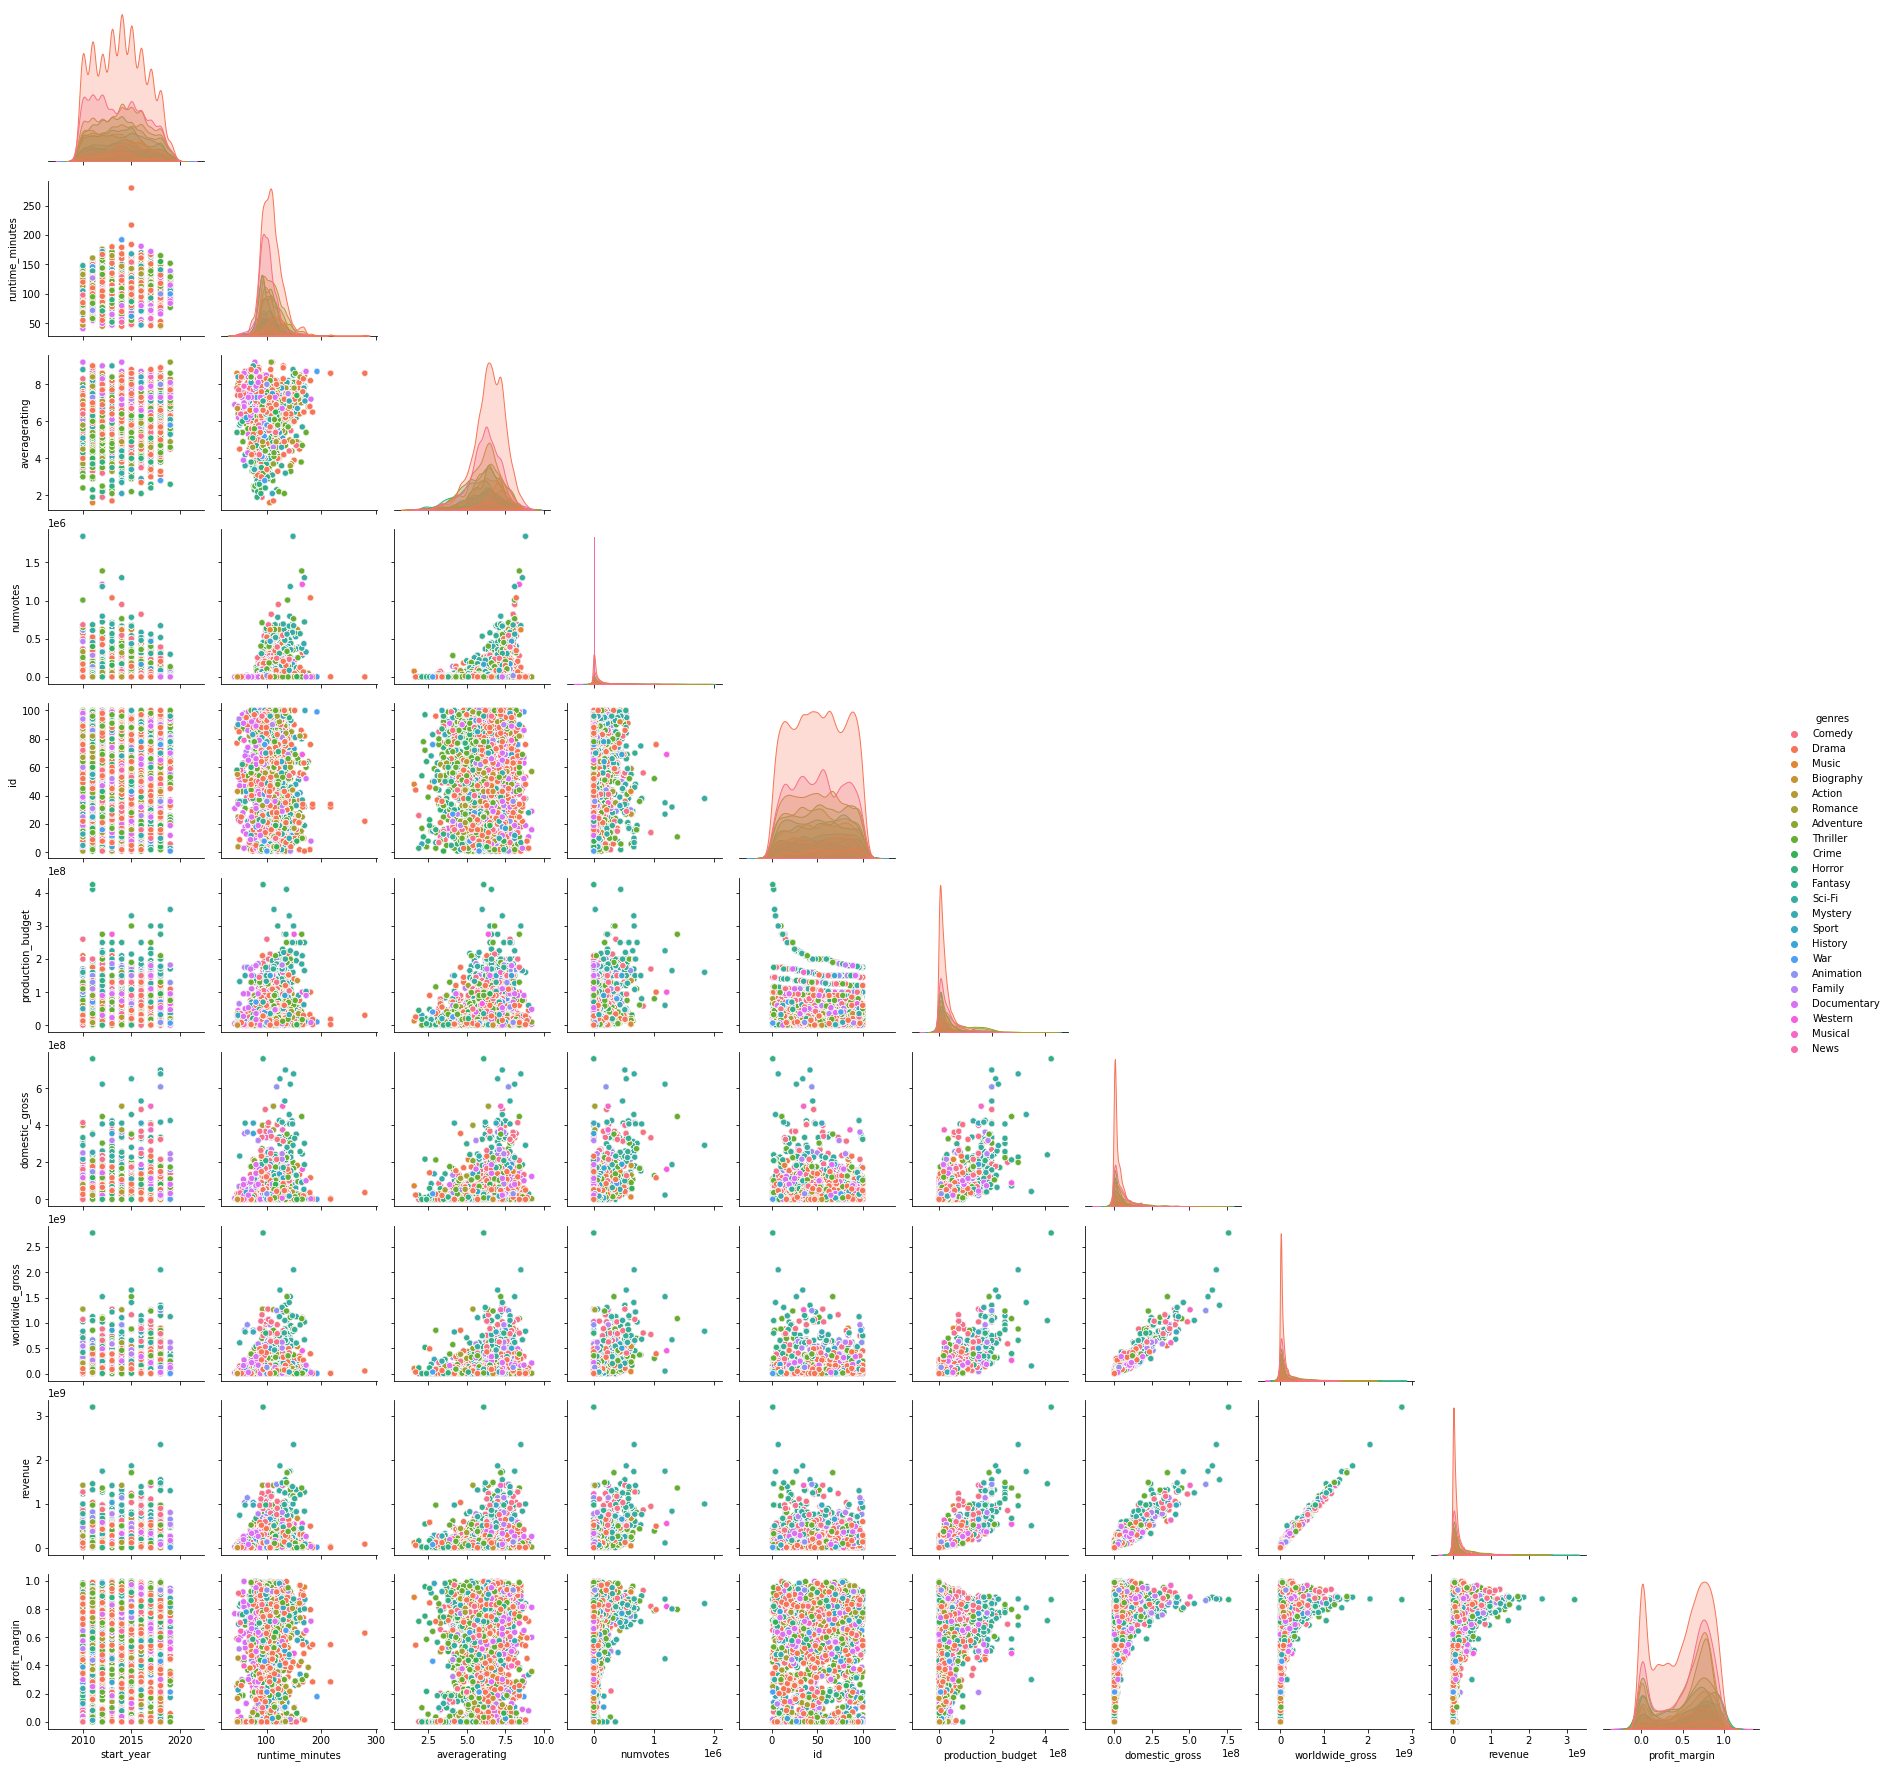

In [93]:
sns.pairplot(imdb_budget_df, corner = True, hue = 'genres')
plt.show()